<a href="https://colab.research.google.com/github/alessiobocco/Diplo_Eco/blob/main/Analisis_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estructura de Informe (7 pág máx - todo dentro de las 7 con graficos, etc.):
escueto,intro, resultados por bullets.
Teenr en cuenta los puntos solicitados en el informe.
1. Exploración de datos, visualización.(lo importante)
2. Limpieza de datos (Decisiones tomadas al respecto - eliminar outliers, crear nuevas variables, eliminar registros, descarte de columnas, reemplazo o eliminación de nulos, etc)
3. Como encaramos el problema y como se prepararon los datos para resolver el problema.
4. Que modelo aplicamos (en el script quedan los pasos intermedios, pero solo agregar el final,se puede comentar los pasos)
5. Resultados y conclusiones.

# Analisis exploratorio

In [1]:
# Paquetes requeridos
!pip install geopy
!pip install geopandas

In [2]:
# Modulos generales
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
import os.path
import geopandas
import folium


# helpful character encoding module
import chardet

%matplotlib inline

/Users/alessiobocco/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/alessiobocco/Diplo_Eco/main/data/precio_locales_CABA.csv", encoding = 'utf-8')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711 entries, 0 to 3710
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3711 non-null   int64  
 1   antig              3711 non-null   int64  
 2   m2total            3711 non-null   int64  
 3   m2cub              3711 non-null   int64  
 4   ambientes          3711 non-null   int64  
 5   banios             3711 non-null   int64  
 6   direccion          3707 non-null   object 
 7   barrio             3711 non-null   object 
 8   comuna             3711 non-null   int64  
 9   latitud            3711 non-null   float64
 10  longitud           3711 non-null   float64
 11  precioUSD          3711 non-null   int64  
 12  m2precioUSD        3711 non-null   float64
 13  comisaria_dista    3711 non-null   float64
 14  obelisco_dista     3711 non-null   float64
 15  nrobos             3711 non-null   int64  
 16  sup_espacio_verde  3711 

Se trabaja con un data set de 19 variables, se observa que la base a utilizar no posee gran cantidad de datos nulos. Las variables están bien catalogadas como float, int y object respetando la naturaleza de las variables.


### Análisis univariado

#### Antiguedad

Text(0.5, 1.0, 'Boxplot')

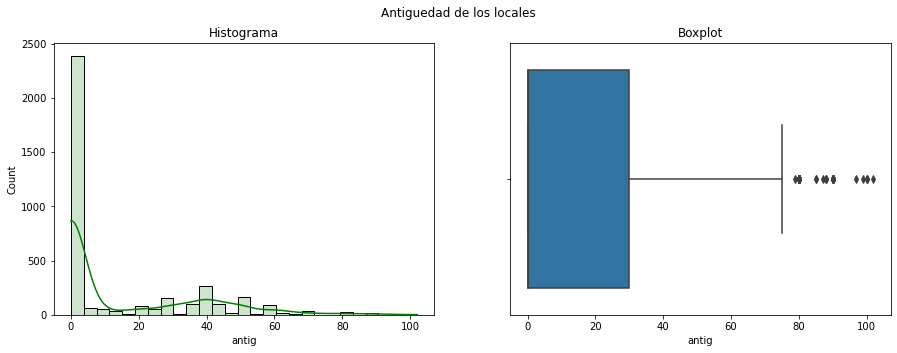

In [5]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Antiguedad de los locales')

# Histograma
sns.histplot(ax=axes[0], x = data['antig'], color='g', alpha = 0.2, kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['antig'])
axes[1].set_title("Boxplot")


   index  value
0      1   2318
1      0   1393


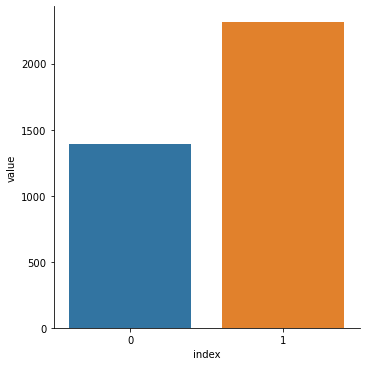

In [6]:
data['antig'].nunique()
estrenar = []
for i in data["antig"]:
  if i == 0:
    estrenar.append(1)
  else:
    estrenar.append(0)

#Se agrega variable Aestrenar al data frame
data["Aestrenar"] = estrenar

#Se grafica la nueva variable
plot= data.Aestrenar.value_counts().to_frame("value").reset_index()
print(plot)
sns.catplot(data=plot, x="index", y="value", kind="bar")

De la variable "antig" se generó una nueva variable "Aestrenar" donde los locales comerciales a esternar adquieren el valor 1 y el resto de locales el valor 0. Se observa una mayor cantidad de locales comerciales a estrenar (2318) que locales usados (1393).

#### Superficie total

Text(0.5, 1.0, 'Boxplot')

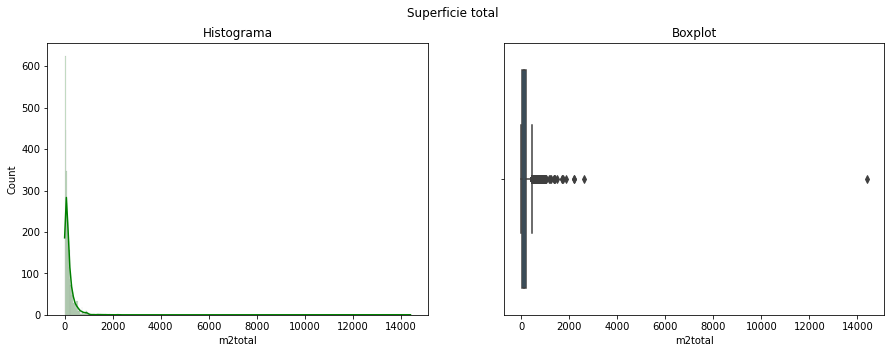

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Superficie total')

# Histograma
sns.histplot(ax=axes[0], x = data['m2total'], color='g', alpha = 0.2, kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['m2total'])
axes[1].set_title("Boxplot")

In [8]:
#identificamos el outlier
shopping = data[data.m2total >= (14000)]
shopping

id  antig  m2total  m2cub  ambientes  banios             direccion  \
1928  1929      0    14400  14400          0       1  San Juan Av. al 3300   

     barrio  comuna   latitud   longitud  precioUSD  m2precioUSD  \
1928  BOEDO       5 -34.62518 -58.412626   16000000       1111.0   

      comisaria_dista  obelisco_dista  nrobos  sup_espacio_verde  \
1928       867.110693      3713.24888      71          16946.578   

      count_gastronomia  count_culturales  Aestrenar  
1928                  4                 5          1

In [9]:
#Se crea una función para normalizar columnas con el método IQR
def normalize (df):
    Q1 = df.quantile(0.25, interpolation = 'midpoint')
    Q3 = df.quantile(0.75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    print( "Old Shape: ", df.shape)
 
    # Upper bound
    upper = np.where(df >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(df <= (Q1-1.5*IQR))
 
    ''' Removing the Outliers '''
    df.drop(upper[0], inplace = True)
    df.drop(lower[0], inplace = True)
 
    print("New Shape: ", df.shape)

In [10]:
#creamos un nuevo df para trabajar para probar la nromalizacion y demás
data_norm = data

In [11]:
#Vemos que m2total tiene valores en 0
(data_norm["m2total"] == 0).value_counts()
data_norm.describe()

id        antig       m2total         m2cub    ambientes  \
count  3711.000000  3711.000000   3711.000000   3711.000000  3711.000000   
mean   1856.000000    14.045810    170.163029    157.668014     0.392886   
std    1071.417752    21.731839    305.479189    305.640985     1.399959   
min       1.000000     0.000000      0.000000      0.000000     0.000000   
25%     928.500000     0.000000     46.000000     40.000000     0.000000   
50%    1856.000000     0.000000    100.000000     90.000000     0.000000   
75%    2783.500000    30.000000    204.000000    190.000000     0.000000   
max    3711.000000   102.000000  14400.000000  14400.000000    22.000000   

            banios       comuna      latitud     longitud     precioUSD  \
count  3711.000000  3711.000000  3711.000000  3711.000000  3.711000e+03   
mean      1.138777     7.282134   -34.602917   -58.424922  4.199982e+05   
std       1.298509     5.449637     0.022221     0.039282  6.216290e+05   
min       0.000000     1.000000   -34.694053   -58.528647  1.500000e+04   
25%       0.000000     2.000000   -34.615422   -58.453078  1.300000e+05   
50%       1.000000     6.000000   -34.601862   -58.421367  2.600000e+05   
75%       2.000000    13.000000   -34.591262   -58.389804  4.900000e+05   
max      30.000000    15.000000   -34.537166   -58.356972  1.600000e+07   

        m2precioUSD  comisaria_dista  obelisco_dista       nrobos  \
count   3711.000000      3711.000000     3711.000000  3711.000000   
mean    3041.276822       687.923745     4787.447523   135.369712   
std     2021.176619       372.091329     3457.615713    72.990312   
min      204.000000        19.198073        1.605225     2.000000   
25%     1750.000000       422.736477     1878.550379    77.000000   
50%     2500.000000       632.887670     4143.061854   131.000000   
75%     3703.000000       922.017363     7218.496630   179.000000   
max    25200.000000      2276.831339    14160.617746   442.000000   

       sup_espacio_verde  count_gastronomia  count_culturales    Aestrenar  
count        3711.000000        3711.000000       3711.000000  3711.000000  
mean        80565.178971          40.021827          9.488278     0.624629  
std         81479.893509          47.551593         12.578286     0.484284  
min           276.336000           0.000000          0.000000     0.000000  
25%         26370.141500           8.000000          1.000000     0.000000  
50%         55826.199000          19.000000          5.000000     1.000000  
75%        117023.245000          62.000000         14.000000     1.000000  
max        811740.562000         251.000000         92.000000     1.000000

In [12]:
#Reemplazamos los valores en 0 de m2total por los valores de m2cub
data_norm.loc[(data_norm["m2total"] == 0), ["m2total"]] = data_norm["m2cub"]
data_norm

id  antig  m2total  m2cub  ambientes  banios               direccion  \
0        1      0      200    200          0       0    Gral Paz y Rivadavia   
1        2     30       50     50          0       1                Asuncion   
2        3     30      414    414          0       2      Avenida Beiro 5574   
3        4     35      414    414          0       2      Avenida Beiro 5574   
4        5     35      285    285          0       1      Avenida Beiro 5574   
...    ...    ...      ...    ...        ...     ...                     ...   
3706  3707      0       92     92          0       1     Av. Cabildo al 2900   
3707  3708      0       24     24          0       1                  Moldes   
3708  3709      0       77     77          0       1      Libertador al 6300   
3709  3710      0       71     71          0       0  Amen���+����+�bar 3330   
3710  3711      0      500    500          0       0         Udaondo al 1300   

            barrio  comuna    latitud   longitud  precioUSD   m2precioUSD  \
0          LINIERS       9 -34.639300 -58.528647    1500000   7500.000000   
1     VILLA DEVOTO      11 -34.611807 -58.528138     125000   2500.000000   
2       VILLA REAL      10 -34.616468 -58.528111     590000   1425.120773   
3       VILLA REAL      10 -34.616344 -58.527918     730000   1763.000000   
4       VILLA REAL      10 -34.616344 -58.527918     550000   1929.000000   
...            ...     ...        ...        ...        ...           ...   
3706         NU�EZ      13 -34.555678 -58.462734     625000   6793.000000   
3707         NU�EZ      13 -34.554970 -58.466854      50000   2083.000000   
3708      BELGRANO      13 -34.553865 -58.450116    1200000  15584.000000   
3709         NU�EZ      13 -34.552512 -58.468436     100000   1408.000000   
3710         NU�EZ      13 -34.547439 -58.452683    1200000   2400.000000   

      comisaria_dista  obelisco_dista  nrobos  sup_espacio_verde  \
0         1162.621600    14053.797191     134          68426.445   
1         1887.227055    13473.139375      23         110997.543   
2         1497.020434    13514.662463      33         115341.039   
3         1506.066814    13495.631683      33         115500.289   
4         1506.066814    13495.631683      33         115500.289   
...               ...             ...     ...                ...   
3706       480.375592     9156.012812      82          20298.027   
3707       513.625533     9510.464316      72          32727.682   
3708       565.138341     8373.449111      63         119063.024   
3709       485.604747     9786.001158      73          34057.670   
3710      1070.090438     9029.171877      31         277740.747   

      count_gastronomia  count_culturales  Aestrenar  
0                    12                 0          1  
1                     3                 0          0  
2                     5                 0          0  
3                     5                 0          0  
4                     5                 0          0  
...                 ...               ...        ...  
3706                 11                 0          1  
3707                  5                 0          1  
3708                 16                 1          1  
3709                  6                 0          1  
3710                  7                 0          1  

[3711 rows x 20 columns]

In [13]:
#Hay datos con m2cub mayores a m2total (seguir viendo)
(data["m2cub"] > data["m2total"]).value_counts()

False    3683
True       28
dtype: int64

In [14]:
#Aplicar normalización sobre m2total

Text(0.5, 1.0, 'Boxplot')

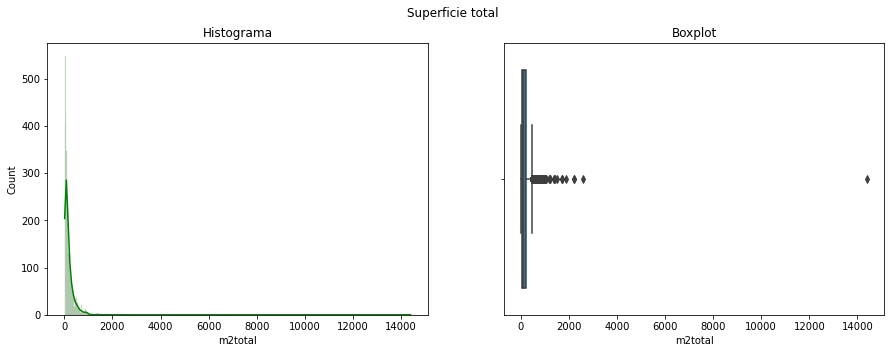

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Superficie total')

# Histograma
sns.histplot(ax=axes[0], x = data_norm['m2total'], color='g', alpha = 0.2, kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data_norm['m2total'])
axes[1].set_title("Boxplot")

#### Metros cuadrados cubiertos

Text(0.5, 1.0, 'Boxplot')

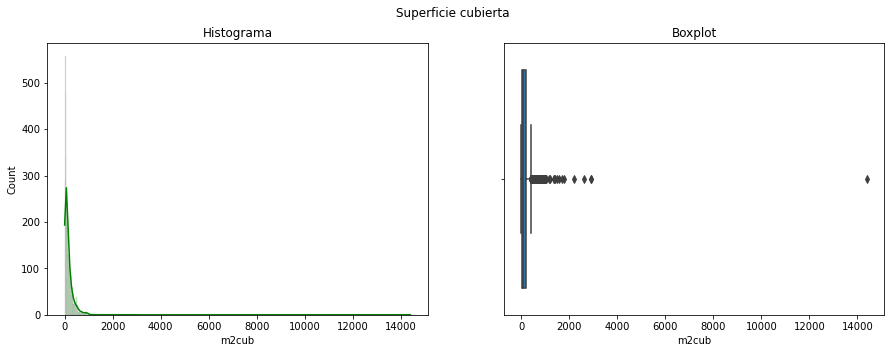

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Superficie cubierta')

# Histograma
sns.histplot(ax=axes[0], x = data['m2cub'], color='g', alpha = 0.2, kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['m2cub'])
axes[1].set_title("Boxplot")

#### Cantidad de ambientes

Text(0.5, 1.0, 'Boxplot')

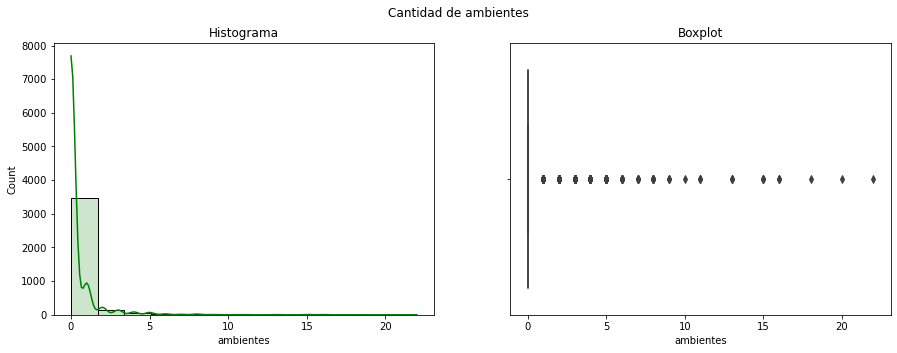

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Cantidad de ambientes')

# Histograma
sns.histplot(ax=axes[0], x = data['ambientes'], color='g', alpha = 0.2, kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['ambientes'])
axes[1].set_title("Boxplot")

#### Cantidad de baños

Text(0.5, 1.0, 'Boxplot')

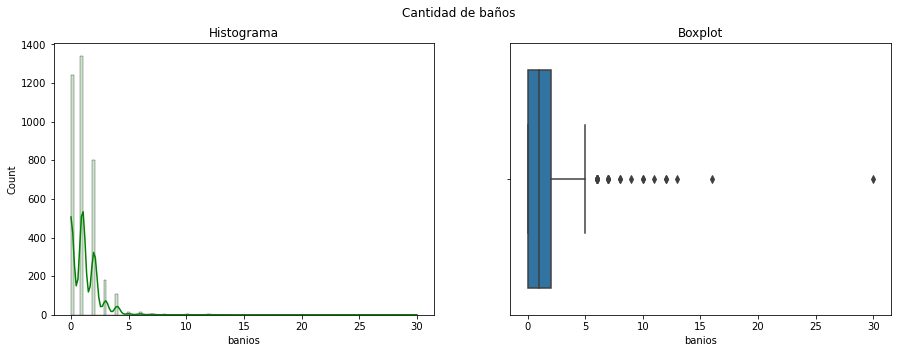

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Cantidad de baños')

# Histograma
sns.histplot(ax=axes[0], x = data['banios'], color='g', alpha = 0.2, kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['banios'])
axes[1].set_title("Boxplot")

#### Barrios

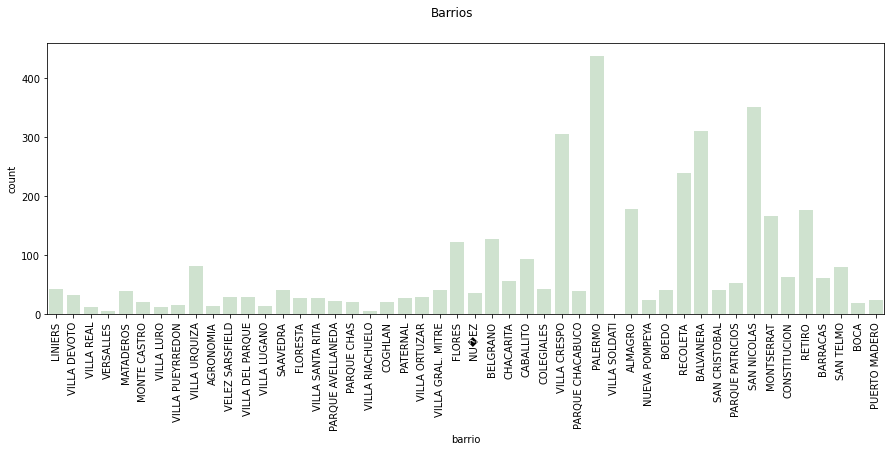

In [19]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
fig.suptitle('Barrios')

# Histograma
sns.countplot(x = data['barrio'], color='g', alpha = 0.2)
axes.tick_params(axis='x', rotation=90)

#### Comunas

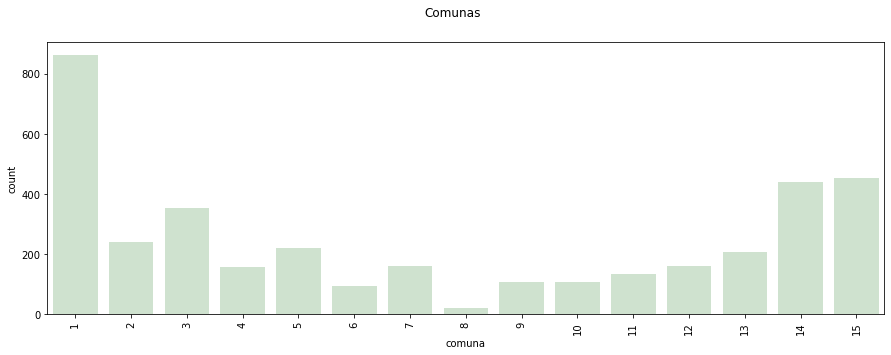

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
fig.suptitle('Comunas')

# Histograma
sns.countplot(x = data['comuna'], color='g', alpha = 0.2)
axes.tick_params(axis='x', rotation=90)

#### Precio

Text(0.5, 1.0, 'Boxplot')

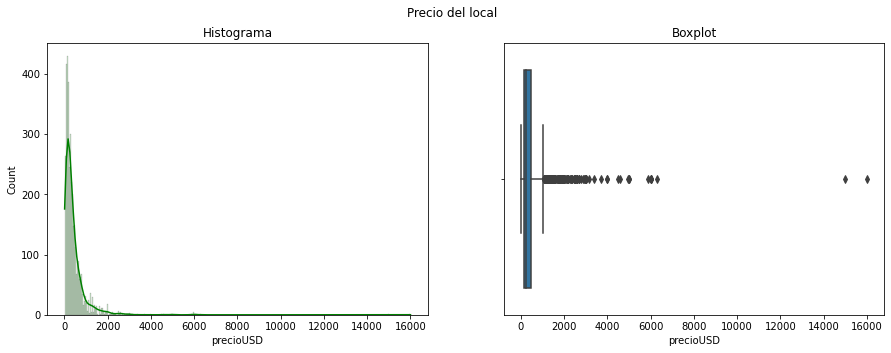

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Precio del local')

# Histograma
sns.histplot(ax=axes[0], x = data['precioUSD']/1000, color='g', alpha = 0.2, kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['precioUSD']/1000)
axes[1].set_title("Boxplot")

#### Precio del metro cuadrado

Text(0.5, 1.0, 'Boxplot')

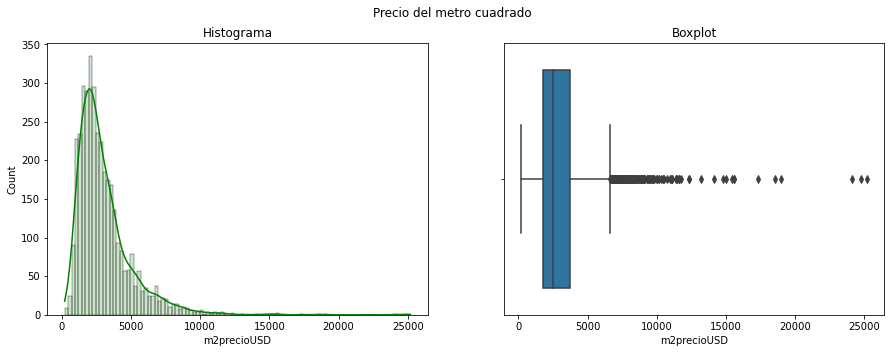

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Precio del metro cuadrado')

# Histograma
sns.histplot(ax=axes[0], x = data['m2precioUSD'], color='g', alpha = 0.2, kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['m2precioUSD'])
axes[1].set_title("Boxplot")

#### Distancia a las comisarias

Text(0.5, 1.0, 'Boxplot')

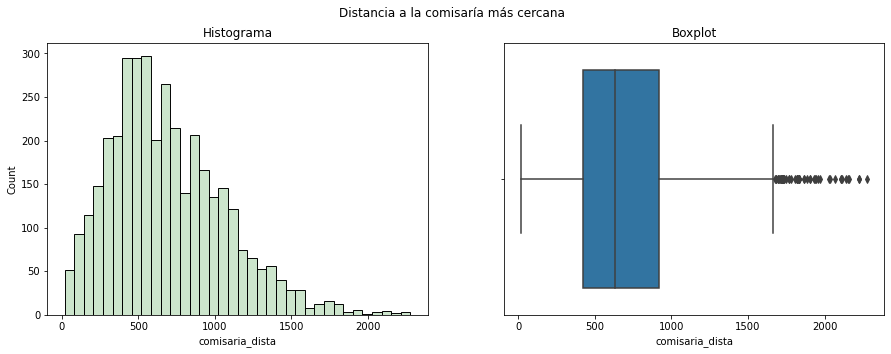

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distancia a la comisaría más cercana')

# Histograma
sns.histplot(ax=axes[0], x = data['comisaria_dista'], color='g', alpha = 0.2)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['comisaria_dista'])
axes[1].set_title("Boxplot")

#### Distancia al Obelisco

Text(0.5, 1.0, 'Boxplot')

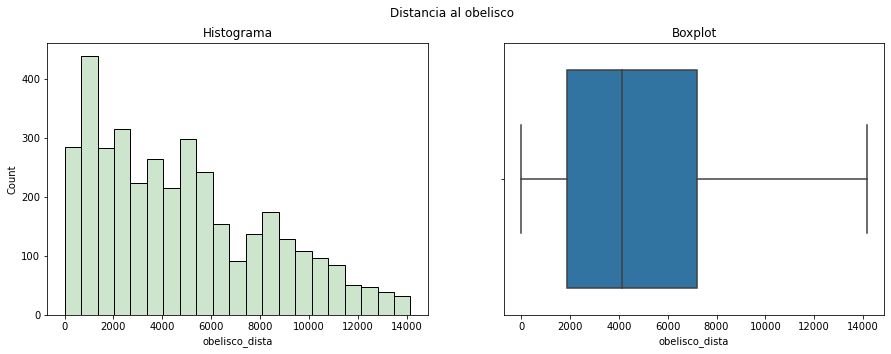

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distancia al obelisco')

# Histograma
sns.histplot(ax=axes[0], x = data['obelisco_dista'], color='g', alpha = 0.2)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['obelisco_dista'])
axes[1].set_title("Boxplot")

#### Cantidad de robos

Text(0.5, 1.0, 'Boxplot')

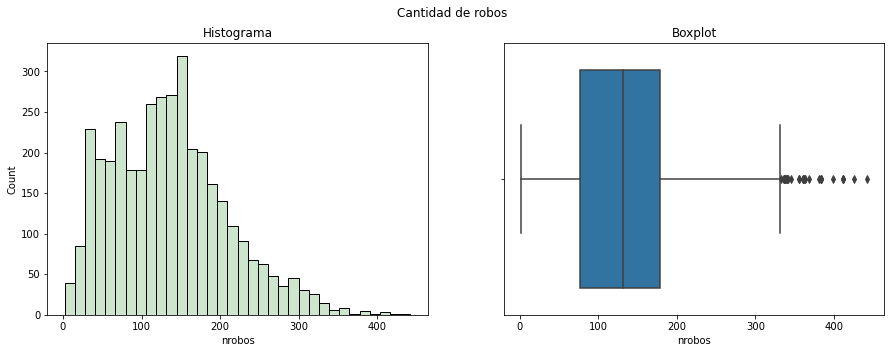

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Cantidad de robos')

# Histograma
sns.histplot(ax=axes[0], x = data['nrobos'], color='g', alpha = 0.2)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['nrobos'])
axes[1].set_title("Boxplot")

#### Superficie de espacios verdes

Text(0.5, 1.0, 'Boxplot')

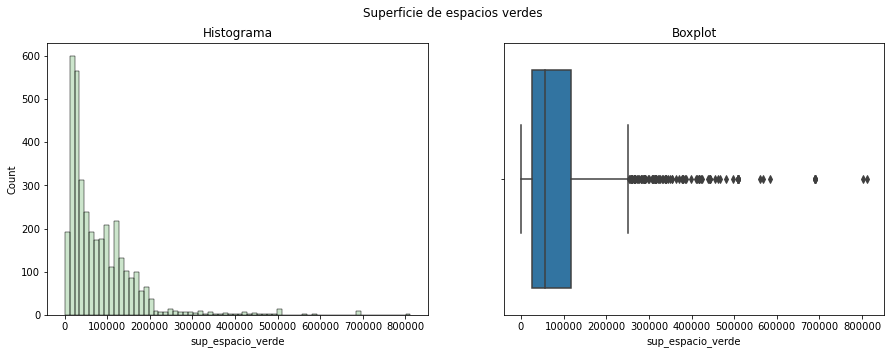

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Superficie de espacios verdes')

# Histograma
sns.histplot(ax=axes[0], x = data['sup_espacio_verde'], color='g', alpha = 0.2)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['sup_espacio_verde'])
axes[1].set_title("Boxplot")

#### Cantidad de espacios gastronomicos

Text(0.5, 1.0, 'Boxplot')

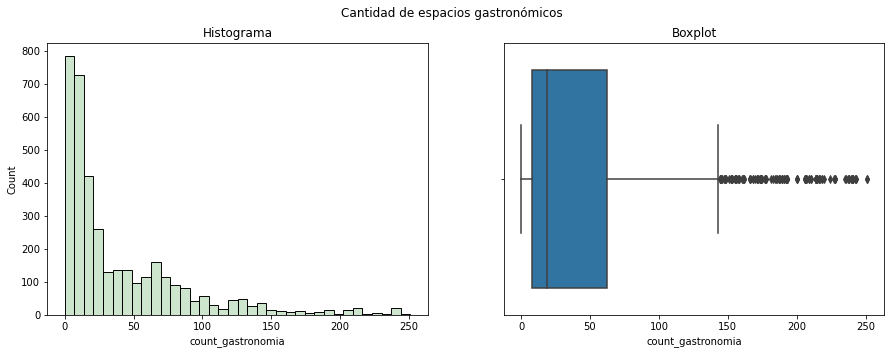

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Cantidad de espacios gastronómicos')

# Histograma
sns.histplot(ax=axes[0], x = data['count_gastronomia'], color='g', alpha = 0.2)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['count_gastronomia'])
axes[1].set_title("Boxplot")

#### Cantidad de espacios culturales

Text(0.5, 1.0, 'Boxplot')

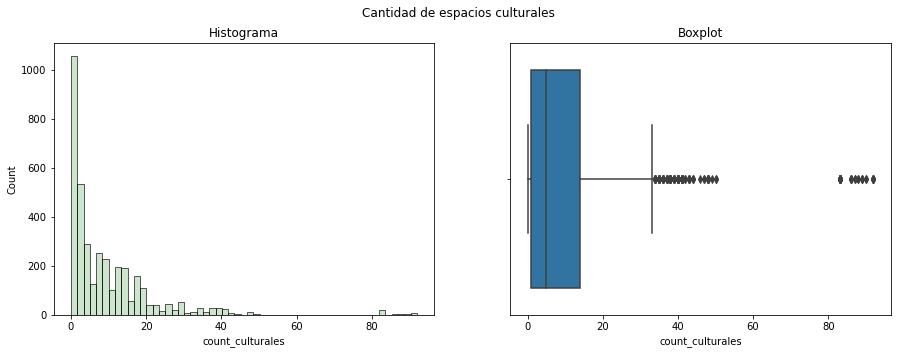

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Cantidad de espacios culturales')

# Histograma
sns.histplot(ax=axes[0], x = data['count_culturales'], color='g', alpha = 0.2)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x=data['count_culturales'])
axes[1].set_title("Boxplot")

### Análisis de variables numéricas

In [29]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.head()

id  antig  m2total  m2cub  ambientes  banios  comuna    latitud   longitud  \
0   1      0      200    200          0       0       9 -34.639300 -58.528647   
1   2     30       50     50          0       1      11 -34.611807 -58.528138   
2   3     30      414    414          0       2      10 -34.616468 -58.528111   
3   4     35      414    414          0       2      10 -34.616344 -58.527918   
4   5     35      285    285          0       1      10 -34.616344 -58.527918   

   precioUSD  m2precioUSD  comisaria_dista  obelisco_dista  nrobos  \
0    1500000  7500.000000      1162.621600    14053.797191     134   
1     125000  2500.000000      1887.227055    13473.139375      23   
2     590000  1425.120773      1497.020434    13514.662463      33   
3     730000  1763.000000      1506.066814    13495.631683      33   
4     550000  1929.000000      1506.066814    13495.631683      33   

   sup_espacio_verde  count_gastronomia  count_culturales  Aestrenar  
0          68426.445                 12                 0          1  
1         110997.543                  3                 0          0  
2         115341.039                  5                 0          0  
3         115500.289                  5                 0          0  
4         115500.289                  5                 0          0

In [30]:
data_num_corr = data_num.corr()['precioUSD'][:-1] # -1 because the latest row is SalePrice
golden_features_list = data_num_corr[abs(data_num_corr) > 0.2].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 4 strongly correlated values with SalePrice:
precioUSD      1.000000
m2total        0.721992
m2cub          0.710366
m2precioUSD    0.246963
Name: precioUSD, dtype: float64


In [31]:
data_num.corr()

id     antig   m2total     m2cub  ambientes  \
id                 1.000000 -0.037895  0.061477  0.054730  -0.003471   
antig             -0.037895  1.000000  0.033707  0.047563   0.069789   
m2total            0.061477  0.033707  1.000000  0.954161   0.074287   
m2cub              0.054730  0.047563  0.954161  1.000000   0.050928   
ambientes         -0.003471  0.069789  0.074287  0.050928   1.000000   
banios             0.046484  0.105140  0.180973  0.192528   0.230368   
comuna            -0.646787 -0.055023 -0.064969 -0.062535   0.026803   
latitud           -0.131673 -0.058541 -0.063337 -0.052453   0.030036   
longitud           0.837567  0.052353  0.070061  0.070976  -0.008632   
precioUSD          0.103088 -0.021312  0.721992  0.710366   0.049537   
m2precioUSD        0.045549 -0.114702 -0.143903 -0.129964  -0.043025   
comisaria_dista   -0.361019 -0.038303  0.012959  0.010228   0.022662   
obelisco_dista    -0.790095 -0.064225 -0.063374 -0.066881   0.019219   
nrobos             0.550731  0.071549  0.026026  0.038558  -0.012559   
sup_espacio_verde  0.262865  0.006571 -0.000188  0.007047  -0.014905   
count_gastronomia  0.534734  0.021218  0.056246  0.070705   0.005787   
count_culturales   0.422997  0.020931  0.058940  0.062523  -0.020525   
Aestrenar          0.114201 -0.833854  0.005248 -0.012422  -0.047990   

                     banios    comuna   latitud  longitud  precioUSD  \
id                 0.046484 -0.646787 -0.131673  0.837567   0.103088   
antig              0.105140 -0.055023 -0.058541  0.052353  -0.021312   
m2total            0.180973 -0.064969 -0.063337  0.070061   0.721992   
m2cub              0.192528 -0.062535 -0.052453  0.070976   0.710366   
ambientes          0.230368  0.026803  0.030036 -0.008632   0.049537   
banios             1.000000 -0.011019  0.003401  0.049168   0.175620   
comuna            -0.011019  1.000000  0.415353 -0.707755  -0.053670   
latitud            0.003401  0.415353  1.000000 -0.088585   0.048187   
longitud           0.049168 -0.707755 -0.088585  1.000000   0.120046   
precioUSD          0.175620 -0.053670  0.048187  0.120046   1.000000   
m2precioUSD       -0.077028  0.075943  0.257099  0.058885   0.246963   
comisaria_dista    0.027668  0.356472 -0.067155 -0.440949  -0.030877   
obelisco_dista    -0.057732  0.673630  0.026444 -0.960215  -0.115093   
nrobos             0.042146 -0.546309 -0.015855  0.648548   0.072730   
sup_espacio_verde  0.002293 -0.174790  0.049526  0.273673   0.057485   
count_gastronomia  0.035061 -0.508838  0.093942  0.598001   0.159050   
count_culturales   0.072506 -0.403065  0.063555  0.487015   0.098373   
Aestrenar         -0.090305 -0.015829  0.039018  0.007754   0.035574   

                   m2precioUSD  comisaria_dista  obelisco_dista    nrobos  \
id                    0.045549        -0.361019       -0.790095  0.550731   
antig                -0.114702        -0.038303       -0.064225  0.071549   
m2total              -0.143903         0.012959       -0.063374  0.026026   
m2cub                -0.129964         0.010228       -0.066881  0.038558   
ambientes            -0.043025         0.022662        0.019219 -0.012559   
banios               -0.077028         0.027668       -0.057732  0.042146   
comuna                0.075943         0.356472        0.673630 -0.546309   
latitud               0.257099        -0.067155        0.026444 -0.015855   
longitud              0.058885        -0.440949       -0.960215  0.648548   
precioUSD             0.246963        -0.030877       -0.115093  0.072730   
m2precioUSD           1.000000        -0.073500       -0.065324  0.018701   
comisaria_dista      -0.073500         1.000000        0.434692 -0.440388   
obelisco_dista       -0.065324         0.434692        1.000000 -0.722792   
nrobos                0.018701        -0.440388       -0.722792  1.000000   
sup_espacio_verde     0.071790        -0.069926       -0.177485 -0.031059   
count_gastronomia     0.112863        -0.332288       -

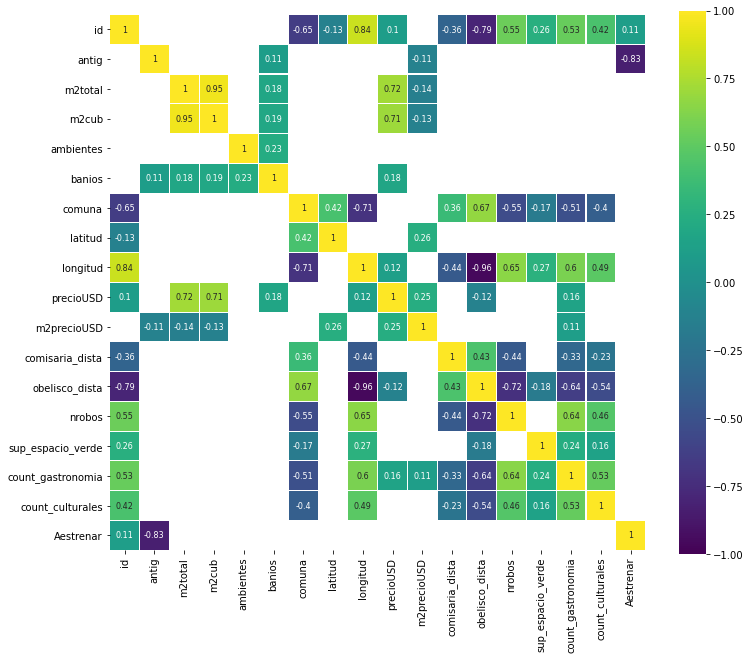

In [32]:
corr = data_num.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## Analisis C -> Q (relación catogeórica - cuantitativa)

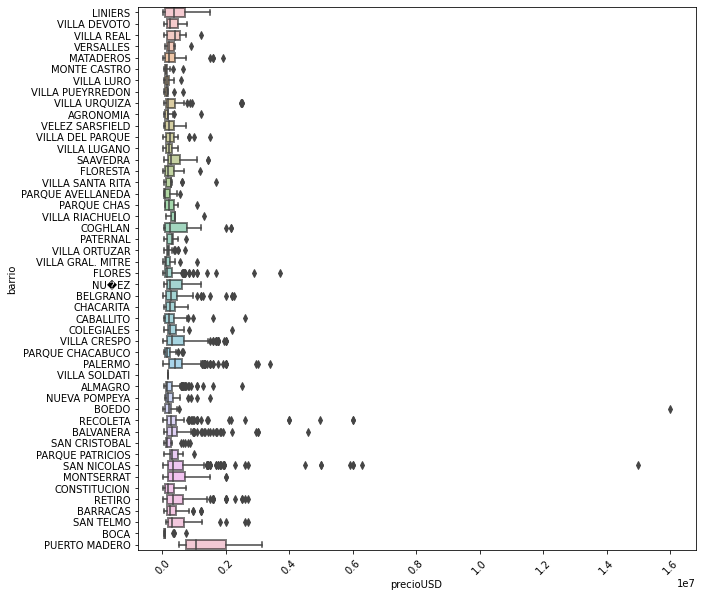

In [33]:
plt.figure(figsize = (10, 10))
ax = sns.boxplot(x='precioUSD', y='barrio', data=data)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.show()

### Variables cuantitativas vs Barrios

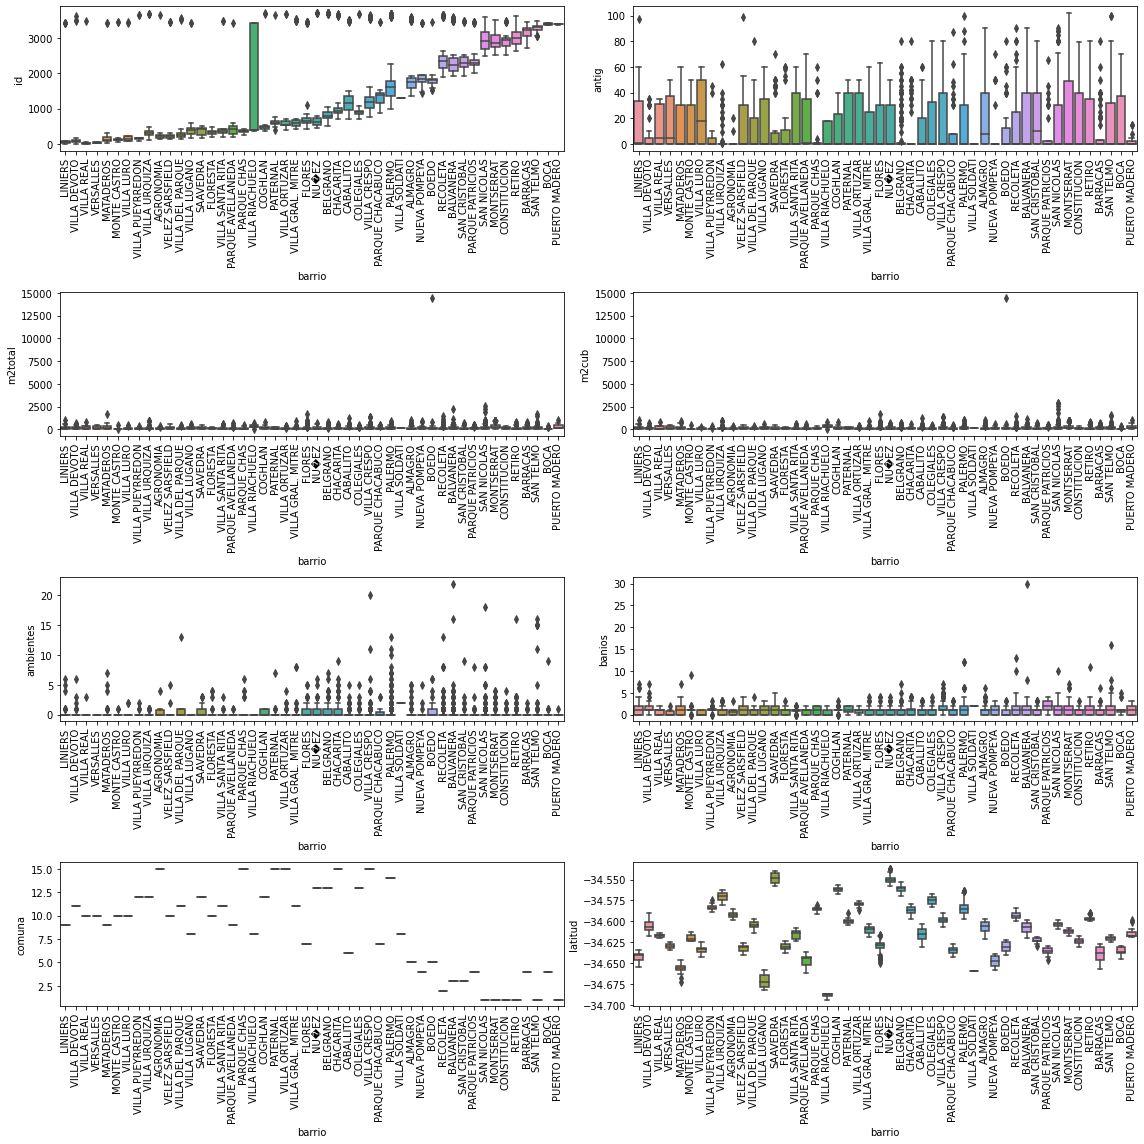

In [34]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16))

for i, ax in enumerate(fig.axes):
    if i < len(data_num.columns):
        sns.boxplot(y = data_num[data_num.columns[i]], x = data.barrio, ax=ax)
        ax.tick_params(axis='x', rotation=90)
fig.tight_layout()

## Análisis exploratorio espacial

In [51]:
%matplotlib inline

import numpy
import pandas
import geopandas
# Graphics
from pysal.viz import splot
from splot.esda import plot_moran
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
# Analysis
import pysal
import contextily
import libpysal
from pysal.explore import esda
from pysal.lib import weights
from numpy.random import seed
from sklearn.cluster import DBSCAN
from pointpats import distance_statistics, QStatistic, random, PointPattern, centrography

In [36]:
data.head()

id  antig  m2total  m2cub  ambientes  banios             direccion  \
0   1      0      200    200          0       0  Gral Paz y Rivadavia   
1   2     30       50     50          0       1              Asuncion   
2   3     30      414    414          0       2    Avenida Beiro 5574   
3   4     35      414    414          0       2    Avenida Beiro 5574   
4   5     35      285    285          0       1    Avenida Beiro 5574   

         barrio  comuna    latitud   longitud  precioUSD  m2precioUSD  \
0       LINIERS       9 -34.639300 -58.528647    1500000  7500.000000   
1  VILLA DEVOTO      11 -34.611807 -58.528138     125000  2500.000000   
2    VILLA REAL      10 -34.616468 -58.528111     590000  1425.120773   
3    VILLA REAL      10 -34.616344 -58.527918     730000  1763.000000   
4    VILLA REAL      10 -34.616344 -58.527918     550000  1929.000000   

   comisaria_dista  obelisco_dista  nrobos  sup_espacio_verde  \
0      1162.621600    14053.797191     134          68426.445   
1      1887.227055    13473.139375      23         110997.543   
2      1497.020434    13514.662463      33         115341.039   
3      1506.066814    13495.631683      33         115500.289   
4      1506.066814    13495.631683      33         115500.289   

   count_gastronomia  count_culturales  Aestrenar  
0                 12                 0          1  
1                  3                 0          0  
2                  5                 0          0  
3                  5                 0          0  
4                  5                 0          0

##### Convertir a datos espaciales

In [37]:
# Convertir base de datos de locales a geodataframe
geo_data = geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data.longitud, data.latitud, crs = 4326)).to_crs(epsg=3857)
# Descargar geojson de la base de datos del gobierno de CABA
url = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios.geojson"
barrios = geopandas.read_file(url).to_crs(epsg=3857)

In [38]:
# Obtener coordenadas planares
geo_data['lon_planar'] = geo_data['geometry'].x
geo_data['lat_planar'] = geo_data['geometry'].y

#### Ubicación de los locales

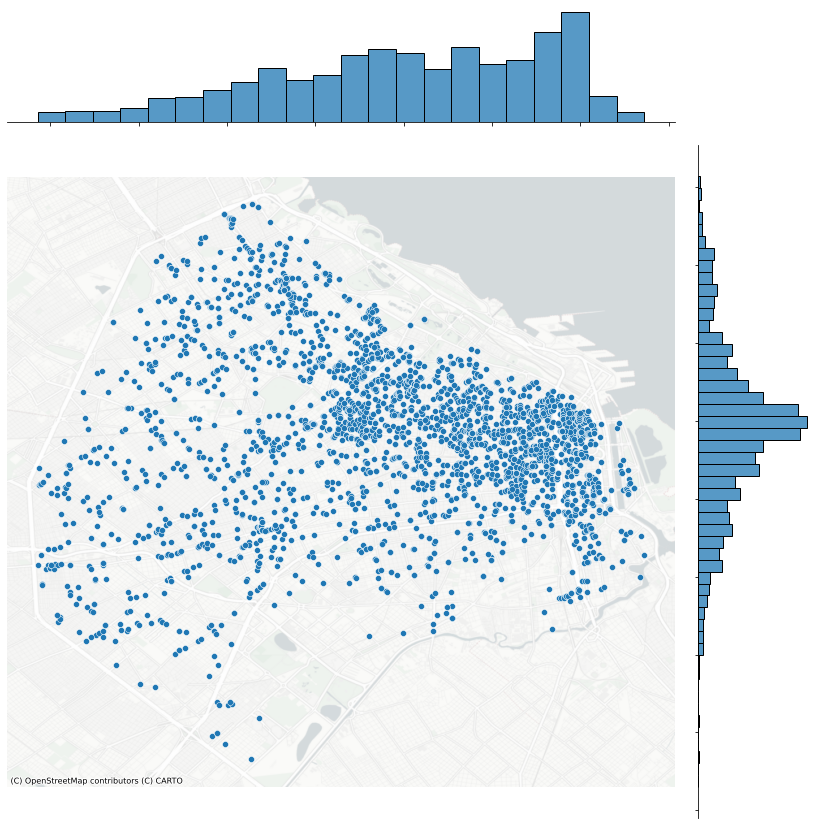

In [46]:
# Generate scatter plot
joint_axes = sns.jointplot(
    x='longitud', y='latitud', data=geo_data, height=12
)
# Add basemap
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels
)
# Clean axes
joint_axes.ax_joint.set_axis_off()
# Display
plt.show()

In [ ]:
# Extentensión de los locales
bounding_box = [geo_data["geometry"].x.min(), geo_data["geometry"].x.max(), geo_data["geometry"].y.min(), geo_data["geometry"].y.max()]
# Cargar mapa base
tilemapbase.start_logging()
tilemapbase.init(create=True)
extent = tilemapbase.extent_from_frame(geo_data, buffer = 10)

In [ ]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(12, 9))

plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=1000)
plotter.plot(ax)
barrios.plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="white")

# Generate and add hexbin with 50 hexagons in each 
# dimension, no borderlines, half transparency,
# and the reverse viridis colormap
hb = ax.hexbin(
    x = geo_data["geometry"].x,
    y = geo_data["geometry"].y,
    gridsize=50, 
    linewidths=0,
    alpha=0.9, 
    cmap='viridis_r',
    mincnt=1
)

# Add colorbar
plt.colorbar(hb)
# Remove axes
ax.set_axis_off()

#### Densidad de locales 

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=1000)
plotter.plot(ax)
barrios.plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="white")
density_plot = sns.kdeplot(
                x = geo_data["geometry"].x,
                y = geo_data["geometry"].y,
                shade=True,
                alpha=0.5,
                cmap="viridis",
                #shade_lowest=False,
                thresh = 0.05,
                zorder=3
                )
# Add colorbar
plt.colorbar(density_plot)
# Remove axes
ax.set_axis_off()

#### Centrografía

La centrografía es el análisis de la centralidad de un patrón de puntos. Por centraliad se refiere a la ubicación general de la distribución de puntos y al patrón de dispersión. Si el hexabin podría considerarse como un histograma espacial, la centragrafía sería el equivalente espacial a las medidas de tendencia central como la media o mediana y a las medidas de dispersión. Estas medidas son útiles ya que permiten resumir la distribución espacial de un único punto. Existen muchos indices en centragrafía para caracterizar el patrón de puntos y describir cuán compacto es alrededor de su centro de masa o cuán irregular es su forma. 

##### Posición

In [50]:
# Calculo de la media y mediana del patrón de puntos
mean_center = centrography.mean_center(geo_data[['lon_planar', 'lat_planar']])
med_center = centrography.euclidean_median(geo_data[['lon_planar', 'lat_planar']])

In [ ]:
# Preparar girua
f, ax = plt.subplots(1, figsize=(12, 9))

# Agregar mapa base
plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=1000)
plotter.plot(ax)
# Agregar barrios
barrios.plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="white")
# Agregar locales
ax.scatter(geo_data['lon_planar'], geo_data['lat_planar'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Media', s = 100, zorder = 10)
# Agregar medidas de pocisión
ax.scatter(*med_center, color='limegreen', marker='o', label='Mediana', s = 100, zorder = 10)


# Agregar leyenda
ax.legend()
# Quitar ejex
ax.set_axis_off()
# Mostrar figura
plt.show()

##### Dispersión

In [ ]:
major, minor, rotation = centrography.ellipse(geo_data[['lon_planar','lat_planar']])

In [ ]:
# Preparar girua
f, ax = plt.subplots(1, figsize=(12, 9))

# Agregar mapa base
plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=1000)
plotter.plot(ax)
# Agregar barrios
barrios.plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="white")
# Plot photograph points
# Agregar locales
ax.scatter(geo_data['lon_planar'], geo_data['lat_planar'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Media', s = 100, zorder = 10)
# Agregar medidas de pocisión
ax.scatter(*med_center, color='limegreen', marker='o', label='Mediana', s = 100, zorder = 10)

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', linestyle='--',
                  label='Elipse Std.')
ax.add_patch(ellipse)

ax.legend()
# Display
# Display
plt.show()

#### Aleatoriedad y clustering

In [ ]:
coordinates = geo_data[['lon_planar', 'lat_planar']].values

In [ ]:
# Crear puntos aleatorios a partir de los datos
# Se repeta la distribución de los datos originales

alpha_shape, alpha, circs = libpysal.cg.alpha_shape_auto(coordinates, return_circles=True)

random_pattern_ashape = random.poisson(alpha_shape, size=len(coordinates))

In [ ]:
f,ax = plt.subplots(1, figsize=(12, 12))

# Agregar mapa base
plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=1000)
plotter.plot(ax)
# Agregar barrios
barrios.plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="white")

plt.scatter(*coordinates.T, color='k', marker='.', label='Puntos observados')
plt.scatter(*random_pattern_ashape.T, color='r', marker='x', label='Puntos aleatorios')

ax.legend(ncol=1, loc='center left')
plt.show()

Los puntos se pueden analizar para comporbar si su distribución es el azar o no. Esto es importante porque algunas técnicas espaciales asumen que los datos surgen de procesos estocásticos. 

La prueba usada es similar al Chi-cuadrado. Se realizar una cuadrícula y se evalúan las proporciones de puntos dentro de cada cuadrante y se lo compara con una distribución al azar. 

In [ ]:
qstat = QStatistic(coordinates, nx = 10, ny = 10)
qstat.plot()

print("El p-valor de la prueba es", qstat.chi2_pvalue)

In [ ]:
qstat_null = QStatistic(random_pattern_ashape, nx = 10, ny = 10)
qstat_null.plot()

print("El p-valor de la prueba es", qstat_null.chi2_pvalue)

Dado que los p-valores de ambas pruebas son menos a 0.05 se puede concluir que dentro del área en estudio, el patrón espacial es completamene aleatorio.  

Un segundo grupo de estadísticos espaciales consideran la distribución de dos métricas en el patrón de puntos: diastancia de los vecinos más cercanos y "huecos" dentro del patrón de puntos. Para ver más detalles se sugiere ver Ripley (1991) donde se describe cómo caracterizar agrupamientos o co-localizaciones en el patrón de puntos. 

El primer tipo estadístico usado en el presente trabajo es la fución G de Ripley que se centra en la distribución de las distancias a los vecinos más cercanos. Es decir, la función G resume las distancias entre cada punto en el patrón y su vecino más cercano. La función contempla la proporción de puntos que son considerados vecinos más cercanos de cada observación dentro de una determinada distancia del mismo. Luego acumula la porpoción de vecinos a medida que se aumenta el radio al rededor de cada punto. La distribución del porcentaje acumulado tiene una forma característica cuando el proceso espacial es completamente aleatorizado. La lógica tras esta función es la siguiente: se puede conocer cuando similar es el patrón de puntos en comparación a uno aleatorio al comparar la distribución acumulada de los vecinos más cercanos a medida que aumenta la distancia. Al comparar la distribución empírica con patrones simulados que tienen una distribución espacial conocida es posible hacer un contraste. Usualmente el proceso espacial usado como referencia es uno Poisson. 

In [52]:
g_test = distance_statistics.g_test(
    coordinates, support=40, keep_simulations=True
)

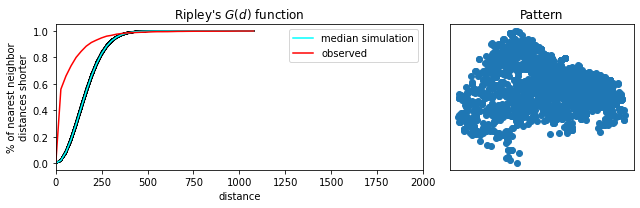

In [53]:
f,ax = plt.subplots(1,2,figsize=(9,3), 
                    gridspec_kw=dict(width_ratios=(6,3)))
# plot all the simulations with very fine lines
ax[0].plot(g_test.support, g_test.simulations.T, color='k', alpha=.01)
# and show the average of simulations
ax[0].plot(g_test.support, numpy.median(g_test.simulations, axis=0), color='cyan', 
         label='median simulation')


# and the observed pattern's G function
ax[0].plot(g_test.support, g_test.statistic, label = 'observed', color='red')

# clean up labels and axes
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest neighbor\ndistances shorter')
ax[0].legend()
ax[0].set_xlim(0,2000)
ax[0].set_title(r"Ripley's $G(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*coordinates.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.show()

Un patrón agrupado debería tener una mayor cantidad de puntos cercanos entre sí en comparación a uno más "disperso", mientras que un proceso aleatoria estaría en algún punto intermedio. Por lo tanto, si la función 𝐺 aumenta rápidamente con la distancia, probablemente se trata de un patrón agrupado en clsuters. Se aumenta lentamente con la distancia, se trataría de un patrón disperso. 

En el gráfico de la izquierda se muestra la G(d), la distancia entre puntos se muestra en el eje x y la fracción de distancias entre vecinos menores al umbral _d_. La curva azul corresponde a la mediana de las _n_ simulaciones de un proceso espacial conocido. La curva roja, mientras tanto, corresponde a la función empírica calculada a partir de los datos. Dado que la roja aumenta con más rapiez que las simulaciones, se puede concluir que la distribución de los locales es más próxima entre ellos que lo que sería si se tratase de una distribución completamente aleatorizada. El patrón de puntos está agrupado. 

Cabe mencionar que este agrupamiento tiene que ver sólo con la ubicación espacial y no con los atributos de cada punto. 

La segunda función usada para caracterizar al patrón espacial de puntos es la función 𝐹 de Ripley. Mientras que la función 𝐺 se centra en las distancias entre puntos dentro del patrón, la 𝐹 analiza la distancia a los puntos desde los distintos espacios vaciós del patrón. Esto que también se conozca a la función 𝐹 como la función de espacios vaciós dado que caracteriza la distancia media desde puntos arbitrarios en los espacios vaciós al patrón de puntos. Más especificamente la funcion 𝐹 acumula, en un gradiente creciente de distancias, el porcentaje de puntos que se pueden encontrar dentro de un rango de distancia y lo compara con el que se encontraría si el procesos fuese completamente aleatorizado. Si el patró tiene muchos "huecps" la tasa de crecimiento de la función 𝐹 será baja. Caso contrario ocurriría si el patrón es muy disperso. Para realizar el contraste se compara nuevamente la función 𝐹 de los datos observados vs la misma función calculada sobre un set de datos con un patrón conocido. 

In [54]:
f_test = distance_statistics.f_test(
    coordinates, support=40, keep_simulations=True
)

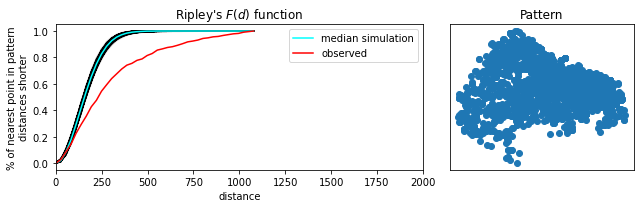

In [55]:
f,ax = plt.subplots(
    1,2,figsize=(9,3), gridspec_kw=dict(width_ratios=(6,3))
)

# plot all the simulations with very fine lines
ax[0].plot(f_test.support, f_test.simulations.T, color='k', alpha=.01)
# and show the average of simulations
ax[0].plot(f_test.support, numpy.median(f_test.simulations, axis=0), color='cyan', 
         label='median simulation')


# and the observed pattern's F function
ax[0].plot(f_test.support, f_test.statistic, label = 'observed', color='red')

# clean up labels and axes
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest point in pattern\ndistances shorter')
ax[0].legend()
ax[0].set_xlim(0,2000)
ax[0].set_title(r"Ripley's $F(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*coordinates.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.show()

Dado que la función 𝐹 aumenta más lentamente que la función teórica, se podría concluir que los datos se encuentran agrupados

Al confirmar la presencia de grupos de datos, étos pueden identificarse mediante técnicas de clustering similares a las utilizadas durante la Diplomatura. Sin embargo, debe quedar claro que estos agrupamientos surgen de la posicion de los locales en el espacio y nada tiene que ver son las características discutidas en secciones anteriores. 

In [56]:
# Cantidad minima de puntos por cluster. En este caso 1%
minp = numpy.round(geo_data.shape[0] * 0.01)
minp

37.0

Desde el punto de vista de la técnica usada, DBSCAN, un cluster es una concentración de al menos _n_ puntos, cada uno dentro de una distancia _r_ de al menos otro punto dentro del cluster. Bajo esta premisa, el algortimo clasifica tres categorías:

* Ruido: puntos fuera del cluster.
* Núcleos: puntos dentro del cluster de al menos _m_ puntos dentro de la diatancia _r_. 
* Bordes: puntos dentro del cluster con menos _m_ puntos dentro de la distancia _r_. 

In [57]:
#  DBSCAN
clusterer = DBSCAN(eps = 500, min_samples = minp) # eps: distancia mínima en metros; min_samples: distancia minima entre puntos
# Fit to our data
clusterer.fit(geo_data[['lon_planar', 'lat_planar']])

DBSCAN(eps=500, min_samples=37.0)

In [58]:
# Cantidad 
len(clusterer.core_sample_indices_)

1656

Con esta configuracion se identificaron 1656 núcleos comerciales (centroides) alrededor de los cuales se agrupan los demás locales. La configuración del algortimo es basnte arbitraria y se necesataría de un experto en el domino para definir mejor las distancias y cantidad de observaciones por grupo. 

In [59]:
# Etiquetas de los tipo de datos
# -1: ruido
# 0: núcleo
# 1: borde
lbls = pandas.Series(clusterer.labels_, index=geo_data.index)

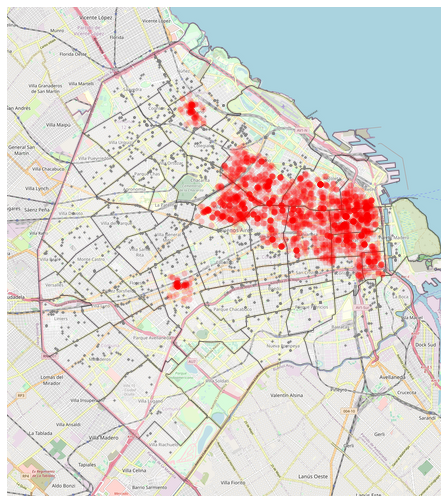

In [60]:
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Agregar mapa base
plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=1000)
plotter.plot(ax)
# Agregar barrios
barrios.plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="white")

# Quitar los puntos que no forman parte de ningún cluster (ruido)
noise = geo_data.loc[lbls==-1, ['lon_planar', 'lat_planar']]
# Graficar ruido en gris
ax.scatter(noise['lon_planar'], noise['lat_planar'], c='grey', s=5, linewidth=0)
# Graficar el rest de los puntos como miembros de un cluster
# Se toma la diferencia entre los índices de ruido y el resto de los datos
ax.scatter(geo_data.loc[geo_data.index.difference(noise.index), 'lon_planar'], \
           geo_data.loc[geo_data.index.difference(noise.index), 'lat_planar'], \
          c='red', linewidth=0, alpha = 0.2)

# Remove axes
ax.set_axis_off()
# Display the figure
plt.show()

Los puntos en rojos pertenecen a un cluster mientras que los grises son observaciones asiladas que no pertenecen a ninguno. Se observa como las áreas comerciales más importantes se ubican en el noreste de la ciudad y en proximidades a avenidas importantes. 

#### Variación espacial de las variables

##### Precio en USD

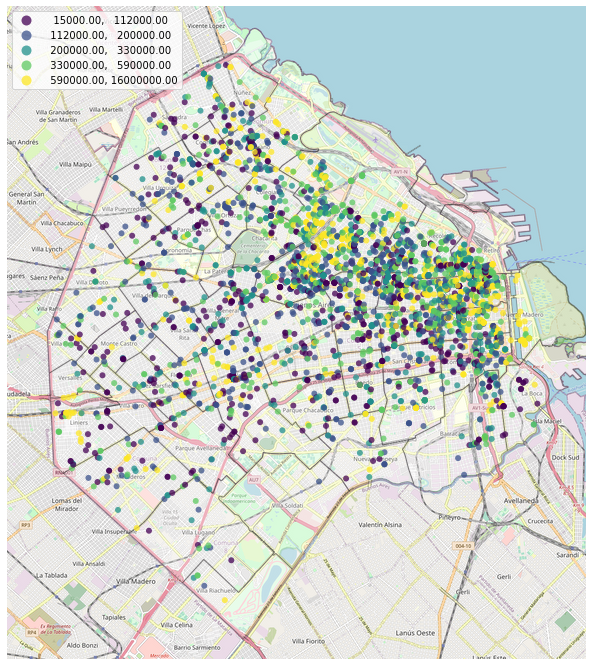

In [63]:
# Clasificacion por percentiles del precio de venta
f, ax = plt.subplots(1, figsize=(12, 12))

# Agregar mapa base
plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=1000)
plotter.plot(ax)
# Agregar barrios
barrios.plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="white")

geo_data.plot(column='precioUSD', 
        cmap='viridis', 
        scheme='quantiles',
        k=5, 
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds={"loc": 2},
        ax=ax
       )

ax.set_axis_off()

In [63]:
from libpysal.weights import Queen, Rook, KNN


In [275]:
# Calcular matriz de pesos espaciales
w = weights.KNN.from_dataframe(geo_data, k = 20)
# Row-standardization
w.transform = 'R'

In [340]:
def spatial_lagged_plot(geodataframe, variable, plot = True, results = False):
    # Nombre de la variable desplazada
    lagged_variable = variable + '_lag'
    # Nuevo data frame para guardar los datos
    geo_data_exploratory = pd.DataFrame()
    geo_data_exploratory['geometry'] = geodataframe['geometry']
    geo_data_exploratory[variable] = geodataframe[variable]
    geo_data_exploratory[lagged_variable] = weights.spatial_lag.lag_spatial(w, geodataframe[variable])
    geo_data_exploratory = geopandas.GeoDataFrame(geo_data_exploratory)
    
    # Graficar
    if plot:
        f, axs = plt.subplots(1, 2, figsize=(16, 10))
        ax1, ax2 = axs

        # Agregar mapa base
        plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=1000)
        plotter.plot(ax1)
        # Agregar barrios
        barrios.plot(ax=ax1, alpha=0.3, edgecolor="black", facecolor="white")
        geo_data_exploratory.plot(column = variable, cmap='viridis', scheme='quantiles',
                k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax1)
        ax1.set_axis_off()
        ax1.set_title(variable)


        # Agregar mapa base
        plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=1000)
        plotter.plot(ax2)
        # Agregar barrios
        barrios.plot(ax=ax2, alpha=0.3, edgecolor="black", facecolor="white")
        geo_data_exploratory.plot(column = lagged_variable, cmap='viridis', scheme='quantiles',
                k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax2)
        ax2.set_axis_off()
        ax2.set_title(lagged_variable)

        plt.show()
        
        # Devolver resultados en un GeoDataFrame
        if results:
            return(geo_data_exploratory)


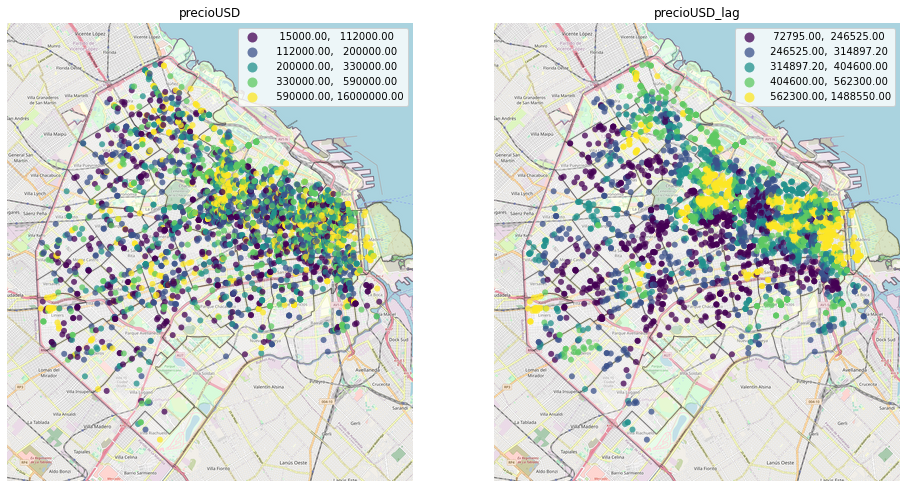

In [301]:
spatial_lagged_plot(geodataframe = geo_data, variable = 'precioUSD')

El mapa de quintiles de la variable espacial lag tiende a aumentar la impresión de similaridad entre valores en el espacio. EN esencia se trata de un suavizado local. 

**Indice de Moran**

In [360]:
def moran_spot_map(geodataframe, variable, matriz_pesos, plot = True, hot = True):
    # Nombre de la variable desplazada
    lagged_variable = variable + '_lag'
    # Nuevo data frame para guardar los datos
    geo_data_exploratory = pd.DataFrame()
    geo_data_exploratory['geometry'] = geodataframe['geometry']
    geo_data_exploratory[variable] = geodataframe[variable]
    geo_data_exploratory[lagged_variable] = weights.spatial_lag.lag_spatial(matriz_pesos, geodataframe[variable])
    geo_data_exploratory = geopandas.GeoDataFrame(geo_data_exploratory)
    
    # Calculo del índice de Morán
    li = esda.moran.Moran_Local(geo_data_exploratory[variable], matriz_pesos)
    # Clases de resultados
    sig = li.p_sim < 0.05
    hotspot = sig * li.q==1
    coldspot = sig * li.q==3
    doughnut = sig * li.q==2
    diamond = sig * li.q==4
    
    if hot:
        # Caracterizar los puntos
        spots = ['n.sig.', 'hot spot']
        labels = [spots[i] for i in hotspot*1]
        # Escala de colores
        hmap = colors.ListedColormap(['red', 'lightgrey'])
    else:
        spots = ['n.sig.', 'cold spot']
        labels = [spots[i] for i in coldspot*1]
        # Escala de colores
        hmap = colors.ListedColormap(['blue', 'lightgrey'])
    
    # Graficar 
    f, ax = plt.subplots(1, figsize=(12, 12))
     # Agregar mapa base
    plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.Carto_Dark, width=1000)
    plotter.plot(ax)
    # Agregar barrios
    barrios.plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="white")
    geo_data_exploratory.assign(cl=labels).plot(column='cl', categorical=True, \
            k=2, cmap=hmap, linewidth=0.01, ax=ax, \
            edgecolor='white', legend=True, alpha = 0.7)
    ax.set_axis_off()
    plt.show()
    

In [363]:
def moran_quadrants_map(geodataframe, variable, matriz_pesos, plot = True):
    # Nombre de la variable desplazada
    lagged_variable = variable + '_lag'
    # Nuevo data frame para guardar los datos
    geo_data_exploratory = pd.DataFrame()
    geo_data_exploratory['geometry'] = geodataframe['geometry']
    geo_data_exploratory[variable] = geodataframe[variable]
    geo_data_exploratory[lagged_variable] = weights.spatial_lag.lag_spatial(matriz_pesos, geodataframe[variable])
    geo_data_exploratory = geopandas.GeoDataFrame(geo_data_exploratory)
    
    # Calculo del índice de Morán
    li = esda.moran.Moran_Local(geo_data_exploratory[variable], matriz_pesos)
    # Clases de resultados
    sig = 1 * (li.p_sim < 0.05)
    hotspot = 1 * (sig * li.q==1)
    coldspot = 3 * (sig * li.q==3)
    doughnut = 2 * (sig * li.q==2)
    diamond = 4 * (sig * li.q==4)
    spots = hotspot + coldspot + doughnut + diamond
    
    spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
    labels = [spot_labels[i] for i in spots]
    # Colores para cada clase
    hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
    f, ax = plt.subplots(1, figsize=(12, 12))
         # Agregar mapa base
    plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.Carto_Dark, width=1000)
    plotter.plot(ax)
    # Agregar barrios
    barrios.plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="white")
    df.assign(cl=labels).plot(column='cl', categorical=True, \
            k=2, cmap=hmap, linewidth=0.1, ax=ax, \
            edgecolor='white', legend=True)
    ax.set_axis_off()
    plt.show()

Interpretación:

In [54]:
from IPython import display


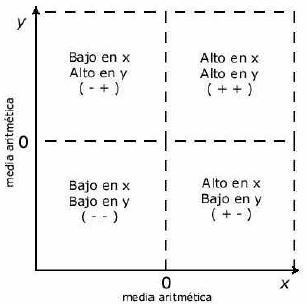

In [55]:
display.Image("/Users/alessiobocco/Downloads/a02g09.png")

Los puntos calientes y fríos se encuentran en los cuadrantres 1 (Alto en x - Alto en y) y en el cuadrante 3 (Bajo en x - Bajo en y), respectivamente. Esto quiere decir que locales caros están rodeados de locales caros y locales baratos están rodeados de locales baratos. Sin embargo, los cuadrantes 2 y 4 indicarían la presencia de outliers espaciales. Son puntos donde se rompen el patrón espacial. Cuando los valores altos de la variable están rodeados de valores bajos se trata de un diamante (diamond) y cuando sucede lo contrario de una dona (doughnut)

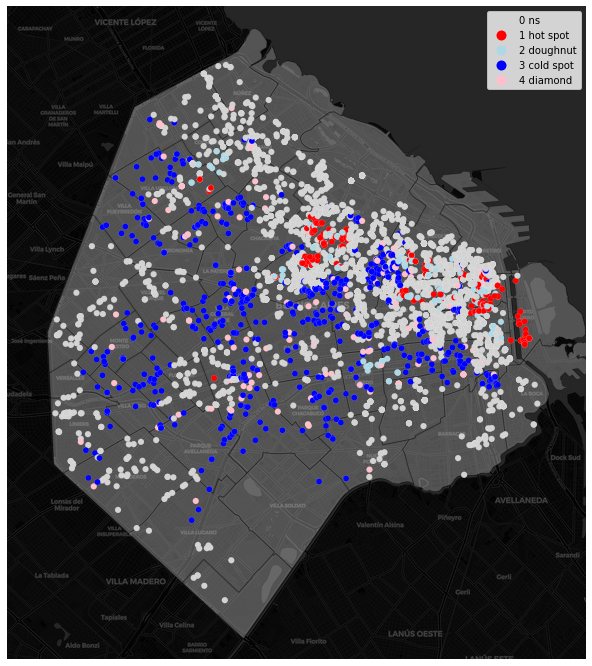

In [364]:
moran_quadrants_map(geodataframe = geo_data, variable = 'precioUSD', matriz_pesos = w)

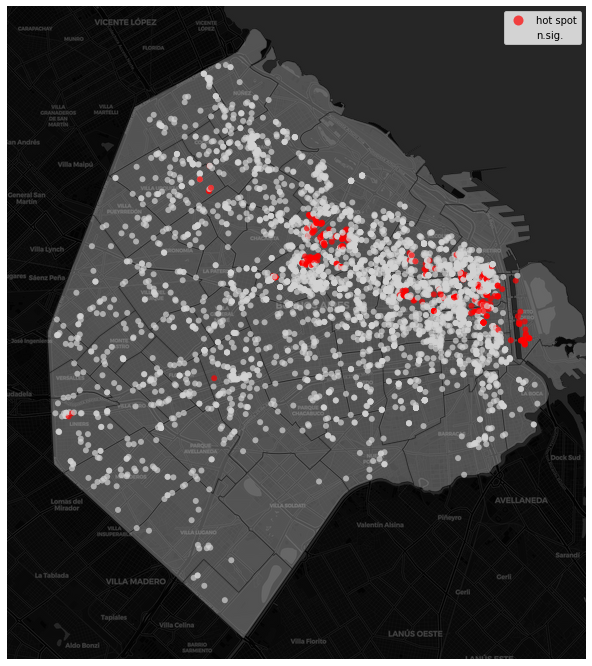

In [362]:
moran_spot_map(geodataframe = geo_data, variable = 'precioUSD', matriz_pesos = w, hot = True)

### Profiling

In [26]:
ProfileReport(data)

TypeError: ignored

In [ ]:
gdf = geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data.longitud, data.latitud))
gdf

In [ ]:
locations = data[['latitud', 'longitud']]
locationlist = locations.values.tolist()

In [ ]:
from folium.plugins import MarkerCluster

In [ ]:
map2 = folium.Map(location=[-34.639300, -58.452683], tiles='CartoDB positron', zoom_start=11)

marker_cluster = MarkerCluster().add_to(map2)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=data['barrio'][point]).add_to(marker_cluster)
map2

### Corrección de direciones

In [ ]:
def get_address(lat, lng, language="es", full_address = True):
        try:
            geolocator = Nominatim(user_agent = 'Diplo')
            reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)
            string = str(lat) + ', ' + str(lng)
            location = geolocator.reverse(string, language=language)
            data = location.raw
            data = data['address']
                        
            if full_address:
                # Crear objetos para guardar resultados
                street = house_number = district = postalCode = state = country = countryCode = ""
                # Variables intermedias
                street         = data.get('road')
                house_number   = data.get('house_number')
                district       = data.get('suburb')
                state_district = data.get('state_district')
                city           = data.get('city')
                postalCode     = data.get('postcode')
                state          = data.get('state')
                country        = data.get('country')
                countryCode    = data.get('country_code').upper()
                address = street +'; '+ house_number +'; '+ district  + '; '+ state_district  + '; ' + city  + '; ' + postalCode  +'; '+  state  +'; '+  country  +'; '+  countryCode
            else:
                # Crear objetos para guardar resultados
                street = house_number = ""
                # Variables intermedias
                street       = data.get('road')
                house_number = data.get('house_number')
                address = street +';'+ house_number
        except:
            address = "Error"
        return str(address)

In [3]:
if not os.path.isfile("./data/coordinates.csv"):
    from geopy.geocoders import Nominatim
    from geopy.extra.rate_limiter import RateLimiter
    
    coordinates = data[['latitud', 'longitud']].copy()
    # Iterar por par coordenado y obtener direcciones
    for i in range(len(coordinates)):
        coordinates.loc[i, 'geocodes'] = get_address(lat = coordinates.latitud[i], lng = coordinates.longitud[i])
    # Guardar resultados
    coordinates.to_csv("./data/coordinates.csv")
else:
    coordinates = pd.read_csv("./data/coordinates.csv")

In [4]:
coordinates

Unnamed: 0    latitud   longitud  \
0              0 -34.639300 -58.528647   
1              1 -34.611807 -58.528138   
2              2 -34.616468 -58.528111   
3              3 -34.616344 -58.527918   
4              4 -34.616344 -58.527918   
...          ...        ...        ...   
3706        3706 -34.555678 -58.462734   
3707        3707 -34.554970 -58.466854   
3708        3708 -34.553865 -58.450116   
3709        3709 -34.552512 -58.468436   
3710        3710 -34.547439 -58.452683   

                                               geocodes  
0     Avenida Rivadavia; 11674; Liniers; Comuna 9; B...  
1     Avenida Lope de Vega; 3500; Villa Real; Comuna...  
2                                                 Error  
3                                                 Error  
4                                                 Error  
...                                                 ...  
3706  Avenida Congreso; 2402; Belgrano; Comuna 13; B...  
3707  Moldes; 3091; Núñez; Comuna 13; Buenos Aires; ...  
3708  Blanco Encalada; 1499; Belgrano; Comuna 13; Bu...  
3709  Amenábar; 3338; Núñez; Comuna 13; Buenos Aires...  
3710  Avenida Guillermo Udaondo; 1306; Belgrano; Com...  

[3711 rows x 4 columns]